### Importing libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from the csv file
data= pd.read_csv("C:\\Users\\LENOVO\\Desktop\\NLP code & Data Set\\2019_nCoV_data.csv")

In [3]:
#checking the number of rows and columns
data.shape

(1345, 8)

In [4]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [5]:
data.tail()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1340,1341,02/12/2020 22:00:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1341,1342,02/12/2020 22:00:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1342,1343,02/12/2020 22:00:00,"San Diego County, CA",US,2020-02-11 01:23:05,1.0,0.0,0.0
1343,1344,02/12/2020 22:00:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0
1344,1345,02/12/2020 22:00:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0


In [6]:
#getting a summary of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
Sno               1345 non-null int64
Date              1345 non-null object
Province/State    992 non-null object
Country           1345 non-null object
Last Update       1345 non-null object
Confirmed         1345 non-null float64
Deaths            1345 non-null float64
Recovered         1345 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 84.1+ KB


In [7]:
#dropping the 1st and 5th column
data.drop("Sno", axis=1, inplace=True)
data.drop("Last Update", axis=1, inplace=True)

In [8]:
data.describe()

,Confirmed,Deaths,Recovered
count,1345.000000,1345.000000,1345.000000
mean,324.628253,7.160595,21.035688
std,2445.132634,71.508144,154.827747
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000
75%,91.000000,0.000000,3.000000
max,48206.000000,1310.000000,3441.000000


In [9]:
#checking for duplicate rows
duplicate_rows=data.duplicated(['Country','Province/State','Date'])
data[duplicate_rows]

,Date,Province/State,Country,Confirmed,Deaths,Recovered


In [10]:
#listing all the countries where the virus has spread to
country_list=list(data['Country'].unique())
print(country_list)
print(len(country_list))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']
33


In [11]:
#merging China and Mainland China
data.loc[data['Country']=='Mainland China','Country']='China'

In [12]:
data['Date'].value_counts()


02/11/2020 20:44:00    73
02/12/2020 22:00:00    73
02/08/2020 23:04:00    72
02/09/2020 23:20:00    72
02/10/2020 19:30:00    72
02/07/2020 20:24:00    72
02/06/2020 20:05:00    71
02/04/2020 22:00:00    70
02/05/2020 12:20:00    70
02/03/2020 21:40:00    69
02/02/2020 21:00:00    67
02/01/2020 23:00:00    67
01/31/2020 19:00:00    63
01/30/2020 21:30:00    59
01/29/2020 21:00:00    56
01/27/2020 20:30:00    52
01/28/2020 23:00:00    52
01/26/2020 23:00:00    47
01/23/2020 12:00:00    45
01/25/2020 22:00:00    44
01/24/2020 12:00:00    41
01/22/2020 12:00:00    38
Name: Date, dtype: int64

In [13]:
data['Date'].nunique()

22

In [14]:
#converting 'Date' column to datetime object
data['Date'] = pd.to_datetime(data['Date'])
#extracting dates from timestamps
data['Date_date']=data['Date'].apply(lambda x:x.date())
data['Date_date'].head()

0    2020-01-22
1    2020-01-22
2    2020-01-22
3    2020-01-22
4    2020-01-22
Name: Date_date, dtype: object

In [15]:
#getting the total number of confirmed cases for each country
df_country=data.groupby(['Country']).max().reset_index(drop=None)
print(df_country[['Country','Confirmed','Deaths','Recovered']])

                 Country  Confirmed  Deaths  Recovered
0              Australia        5.0     0.0        2.0
1                Belgium        1.0     0.0        0.0
2                 Brazil        0.0     0.0        0.0
3               Cambodia        1.0     0.0        1.0
4                 Canada        4.0     0.0        1.0
5                  China    48206.0  1310.0     3441.0
6                Finland        1.0     0.0        1.0
7                 France       11.0     0.0        2.0
8                Germany       16.0     0.0        0.0
9              Hong Kong       50.0     1.0        1.0
10                 India        3.0     0.0        0.0
11                 Italy        3.0     0.0        0.0
12           Ivory Coast        0.0     0.0        0.0
13                 Japan       45.0     0.0        9.0
14                 Macau       10.0     0.0        2.0
15              Malaysia       18.0     0.0        3.0
16                Mexico        0.0     0.0        0.0
17        

In [16]:
#preparing data for a time-series analysis
df_by_date=data.groupby(['Date_date']).sum().reset_index(drop=None)
df_by_date['daily_cases']=df_by_date.Confirmed.diff()
df_by_date['daily_deaths']=df_by_date.Deaths.diff()
df_by_date['daily_recoveries']=df_by_date.Recovered.diff()
print(df_by_date)

     Date_date  Confirmed  Deaths  Recovered  daily_cases  daily_deaths  \
0   2020-01-22      555.0     0.0        0.0          NaN           NaN   
1   2020-01-23      653.0    18.0       30.0         98.0          18.0   
2   2020-01-24      941.0    26.0       36.0        288.0           8.0   
3   2020-01-25     2019.0    56.0       49.0       1078.0          30.0   
4   2020-01-26     2794.0    80.0       54.0        775.0          24.0   
5   2020-01-27     4473.0   107.0       63.0       1679.0          27.0   
6   2020-01-28     6057.0   132.0      110.0       1584.0          25.0   
7   2020-01-29     7783.0   170.0      133.0       1726.0          38.0   
8   2020-01-30     9776.0   213.0      187.0       1993.0          43.0   
9   2020-01-31    11374.0   259.0      252.0       1598.0          46.0   
10  2020-02-01    14549.0   305.0      340.0       3175.0          46.0   
11  2020-02-02    17295.0   362.0      487.0       2746.0          57.0   
12  2020-02-03    20588.0

Text(0.5, 0, 'Dates')

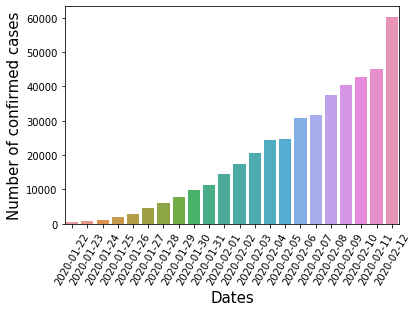

In [17]:
#plotting a bar chart of confirmed cases over time
sns.axes_style("whitegrid")
sns.barplot(
x="Date_date", 
y="Confirmed", data=data.groupby(['Date_date']).sum().reset_index(drop=None)
)
plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


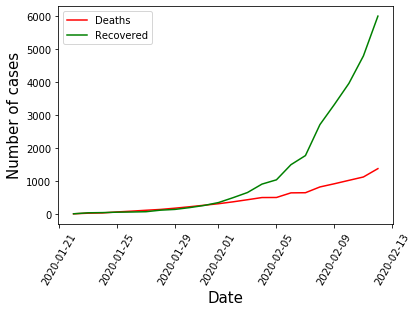

In [18]:
#plotting two line plots for deaths and recoveries respectively
plt.plot('Date_date', 'Deaths',
data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='red')

plt.plot('Date_date', 'Recovered', 
data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='green')

plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.legend()
plt.show()


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

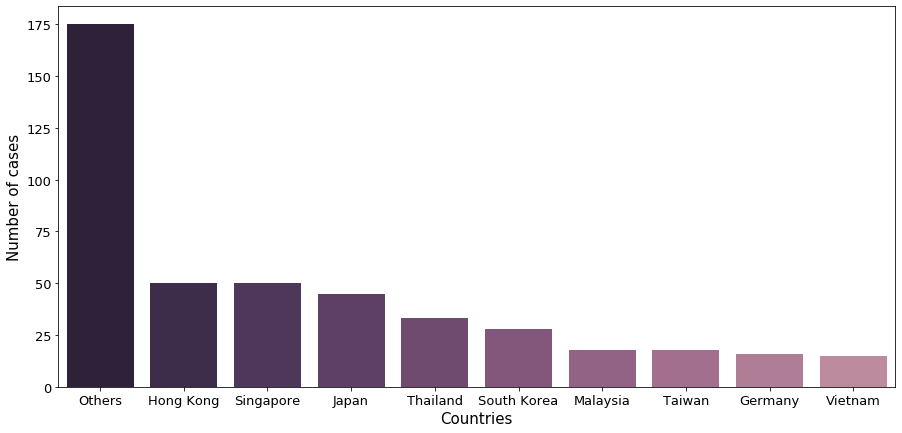

In [19]:
#We know that China is the most affected country by a large margin, #so lets create a bar plot to compare countries other than China
#increasing the figure size
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(
x="Country",
y="Confirmed",
data=df_country[df_country.Country!='China'].nlargest(10,'Confirmed'),
palette=sns.cubehelix_palette(15, reverse=True)
)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Countries',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

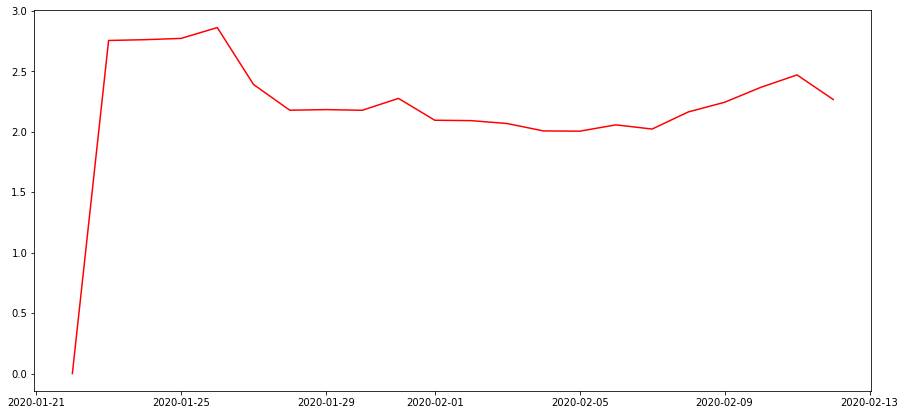

In [20]:
#The mortality rate, at any point in time, can be roughly calculated #by dividing the number of deaths by the number of confirmed cases
df_by_date['mrate']=df_by_date.apply(lambda x: x['Deaths']*100/(x['Confirmed']), axis=1)
plt.plot('Date_date','mrate',data=df_by_date, color='red')
plt.show()

Text(0, 0.5, 'Number of cases')

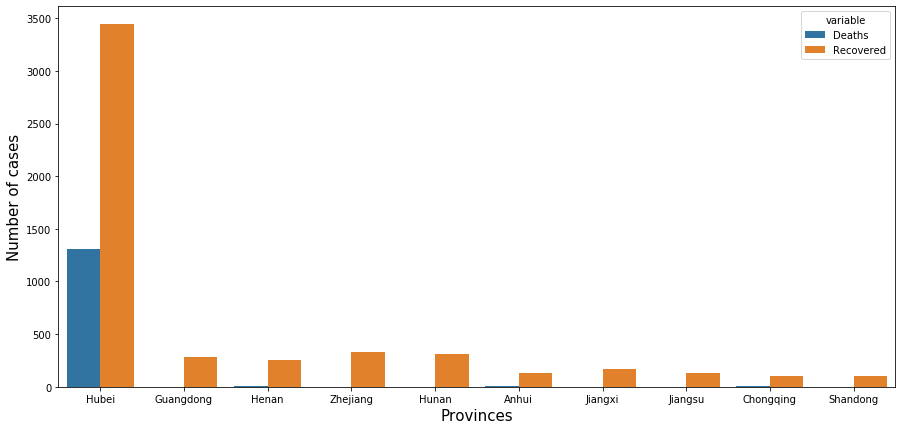

In [21]:
#creating a separate dataframe for provinces
df_province=data[data['Country']=='China'].groupby(['Province/State']).max().reset_index(drop=None)
#selecting 10 most affected provinces
df_province=df_province.nlargest(10,'Confirmed')
df_province=df_province[['Province/State','Deaths','Recovered']]
#for multi-bar plots in seaborn, we need to melt the dataframe so #that the the deaths and recovered values are in the same column
df_province= df_province.melt(id_vars=['Province/State'])

sns.barplot(
x='Province/State', 
y='value', 
hue='variable', 
data=df_province
)
plt.xlabel('Provinces',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)
